# Financial Econometrics I: Homework 1

Team Member:

Lin Zhang : 15845542@fsv.cuni.cz

Weiwei Qu : 51014941@fsv.cuni.cz

# Problem 1

##### From the the symbols.csv choose 1 of the 10 Sectors (Industrials, Financials, Health Care, etc.). Download the prices for all the stocks belonging to the corresponding Sector for the period 01/2015 - 12/2021. Exclude the stocks that are not available in the quantmod package. Check that your data contains all the desired symbols (include this check in your output).

##### 

In [1]:
# Setup environment
Sys.setenv(LANG = "en")
library(repr)
library("quantmod")
library(moments)
library("stabledist")
library("StableEstim")
options(repr.plot.width = 10, repr.plot.height = 8)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'stabledist' was built under R version 3.6.3"Warning message:
"package 'StableEstim' was built under R version 3.6.3"Loading required package: Matrix
Loading required package: testthat
Warning message:
"package 'testthat' was built under R version 3.6.3"

In [2]:
# read data from file
smbs <- read.csv('symbols.csv',sep = ';',colClasses = "character")
head(smbs)

锘縎ymbol,Name,Sector
MMM,3M Co.,Industrials
ACE,ACE Limited,Financials
ABT,Abbott Laboratories,Health Care
ANF,Abercrombie & Fitch Company A,Consumer Discretionary
ACN,Accenture,Information Technology
ADBE,Adobe Systems Inc,Information Technology


 Our group chose 'Consumer Discretionary' sector as our Homework data set. 

In [3]:
symbols <- smbs[smbs['Sector'] == 'Consumer Discretionary',1]
symbols

[1] "ANF"   "AMZN"  "APOL"  "AN"    "AZO"   "BEAM"  "BBBY"  "BBY"   "BIG"  
[10] "HRB"   "BWA"   "CVC"   "KMX"   "CCL"   "CBS"   "CMG"   "COH"   "CMCSA"
[19] "DHI"   "DRI"   "DV"    "DTV"   "DISCA" "DLTR"  "EXPE"  "FDO"   "F"    
[28] "FOSL"  "GME"   "GCI"   "GPS"   "GPC"   "GT"    "HOG"   "HAR"   "HAS"  
[37] "HD"    "IGT"   "IPG"   "JCI"   "KSS"   "LEG"   "LEN"   "LTD"   "LOW"  
[46] "M"     "MAR"   "MAT"   "MCD"   "MHP"   "NWL"   "NWSA"  "NKE"   "JWN"  
[55] "ORLY"  "OMC"   "JCP"   "RL"    "PHM"   "ROST"  "SNI"   "SHLD"  "SHW"  
[64] "SNA"   "SWK"   "SPLS"  "SBUX"  "HOT"   "TGT"   "TIF"   "TWX"   "TWC"  
[73] "TJX"   "TRIP"  "URBN"  "VFC"   "VIAB"  "DIS"   "WPO"   "WHR"   "WYN"  
[82] "WYNN"  "YUM"

In [4]:
#download data
data <- lapply(symbols, function(y)
{
    try(getSymbols(y, auto.assign = FALSE,from = as.Date('2015-01-01'), to = '2021-12-31'),silent=TRUE)
})


'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"APOL download failed; trying again."Warning message:
"CVC download failed; trying again."Warning message:
"CBS download failed; trying again."Warning message:
"COH download failed; trying again."Warning message:
"DTV download failed; trying again."Warning message:
"FDO download failed; trying again."Warning message:
"HAR contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"LTD download fail

In [5]:
names(data) <- symbols
# check all symbols used for downloading process are used, no data is missing
length(symbols)
length(data)
# save original data before filter for invalid symbols
data0 <- data

[1] 83

[1] 83

In [6]:
# remove stocks that are not available from Default Yahoo data source
for (i in seq_along(data)) {    
   if(grepl('Error', data[[i]][1], fixed=TRUE)){
       print(data[[i]][1])
       data[[i]]<-NULL
    }
}

Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"APOL\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"APOL\".\nAPOL download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"CVC\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"CVC\".\nCVC download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"CBS\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"CBS\".\nCBS download failed after two attempts. Error message:\nHTTP error 404.\n"
[1] "Error in getSymbols.yahoo(Symbols = \"COH\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"COH\".\nCOH download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"DTV\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"DTV\".\nDTV download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"FDO\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"FDO\".\nFDO download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in i

[1] "Error in getSymbols.yahoo(Symbols = \"LTD\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"LTD\".\nLTD download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in i

[1] "Error in getSymbols.yahoo(Symbols = \"JCP\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"JCP\".\nJCP download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"SPLS\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"SPLS\".\nSPLS download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"TIF\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"TIF\".\nTIF download failed after two attempts. Error message:\nHTTP error 404.\n"
[1] "Error in getSymbols.yahoo(Symbols = \"TWC\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"TWC\".\nTWC download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"VIAB\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"VIAB\".\nVIAB download failed after two attempts. Error message:\nHTTP error 404.\n"
[1] "Error in getSymbols.yahoo(Symbols = \"WPO\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"WPO\".\nWPO download failed after two attempts. Error message:\nHTTP error 404.\n"
[1] "Error in getSymbols.yahoo(Symbols = \"WYN\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"WYN\".\nWYN download failed after two attempts. Error message:\nHTTP error 404.\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

ERROR: Error in data[[i]]: subscript out of bounds


In [7]:
# check available symbols data
length(data)

[1] 69

In [8]:
# save data before filter for closing price
data2<-data

# only need the closing price
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, paste0(y, '.Close')]
})

# check the date range
head(data[[1]])
tail(data[[1]])

           ANF.Close
2015-01-02     28.58
2015-01-05     28.27
2015-01-06     28.88
2015-01-07     29.33
2015-01-08     29.11
2015-01-09     28.19

           ANF.Close
2021-12-22     34.20
2021-12-23     34.36
2021-12-27     34.71
2021-12-28     34.33
2021-12-29     35.34
2021-12-30     35.46

In [9]:
# Check data output
lapply(data, head)

[[1]]
           ANF.Close
2015-01-02     28.58
2015-01-05     28.27
2015-01-06     28.88
2015-01-07     29.33
2015-01-08     29.11
2015-01-09     28.19

[[2]]
           AMZN.Close
2015-01-02     308.52
2015-01-05     302.19
2015-01-06     295.29
2015-01-07     298.42
2015-01-08     300.46
2015-01-09     296.93

[[3]]
           AN.Close
2015-01-02    60.04
2015-01-05    59.21
2015-01-06    59.12
2015-01-07    59.51
2015-01-08    59.86
2015-01-09    58.95

[[4]]
           AZO.Close
2015-01-02    616.79
2015-01-05    608.49
2015-01-06    607.82
2015-01-07    607.24
2015-01-08    606.00
2015-01-09    606.02

[[5]]
           BEAM.Close
2020-02-06      18.75
2020-02-07      20.62
2020-02-10      22.10
2020-02-11      24.10
2020-02-12      27.60
2020-02-13      29.20

[[6]]
           BBBY.Close
2015-01-02      76.73
2015-01-05      75.85
2015-01-06      75.43
2015-01-07      78.21
2015-01-08      79.45
2015-01-09      74.09

[[7]]
           BBY.Close
2015-01-02     38.79
2015-01-05    

##### 1. Compute the log-returns and simple returns for all the stocks. Save these to lrets and rets objectsm respectively. From now on, you will work with the logarithmic returns.

In [10]:
# compute log-returns for returns
lrets <- lapply(data, function(y){
  y <- na.omit(diff(log(y)))  
})
head(lrets[[1]])

# compute simple returns
rets <- lapply(data, function(y){
  y <- na.omit(diff(y)/lag(y))
})

head(rets[[1]])

              ANF.Close
2015-01-05 -0.010906001
2015-01-06  0.021348108
2015-01-07  0.015461604
2015-01-08 -0.007529091
2015-01-09 -0.032114452
2015-01-12  0.003541080

              ANF.Close
2015-01-05 -0.010846746
2015-01-06  0.021577609
2015-01-07  0.015581753
2015-01-08 -0.007500818
2015-01-09 -0.031604259
2015-01-12  0.003547357

##### 2. Compute the sample mean, variance, skewness, excess kurtosis, minimum and maximum of the series of logarithmic returns for each of the stocks in your sample. Display these in a nicely readable manner.

In [11]:
#Compute the sample mean, variance, skewness, excess kurtosis, minimum and maximum
stats <- lapply(lrets, function(y){
    c(mean(y), var(y), skewness(y),kurtosis(y),min(y), max(y))
})

#round the numbers
stats <- sapply(stats, function(y){
    round(y, 4)
})

#name the row: mean, variance, skewness, excess kurtosis, minimum and maximum
rownames(stats) <- c('Mean', 'Var', 'Skew', 'Kurt', 'Min', 'Max')
colnames(stats) <- names(data2)
stats

,ANF,AMZN,AN,AZO,BEAM,BBBY,BBY,BIG,HRB,BWA,...,TGT,TWX,TJX,TRIP,URBN,VFC,DIS,WHR,WYNN,YUM
Mean,0.0001,0.0014,0.0004,0.0007,0.0031,-0.0009,0.0005,0.0001,-0.0002,-0.0001,...,0.0006,0.0002,0.0005,-0.0006,-0.0001,0.0000,0.0003,0.0001,-0.0003,0.0006
Var,0.0013,0.0004,0.0005,0.0003,0.0031,0.0019,0.0006,0.0011,0.0005,0.0005,...,0.0003,0.0002,0.0003,0.0010,0.0009,0.0004,0.0003,0.0005,0.0011,0.0003
Skew,-0.4324,0.4656,-0.5106,-1.6245,0.1478,0.0196,0.0736,-0.2540,-1.0270,-0.4388,...,0.2351,-0.8875,-0.9955,0.0381,0.2087,-0.6835,0.3207,-0.3877,-0.1473,-0.3431
Kurt,12.2129,9.2567,14.5470,21.3267,4.8774,28.7084,14.4836,29.6386,17.3622,6.7326,...,18.9366,11.8583,25.9547,15.5682,8.4893,12.4338,16.8644,23.3022,12.5820,40.1845
Min,-0.3075,-0.0825,-0.2121,-0.1736,-0.2668,-0.4525,-0.1655,-0.3502,-0.1977,-0.1220,...,-0.1310,-0.0938,-0.2281,-0.2643,-0.1650,-0.1384,-0.1391,-0.2183,-0.2802,-0.2087
Max,0.2235,0.1322,0.1462,0.1114,0.2087,0.4831,0.1946,0.2831,0.1404,0.1498,...,0.1859,0.0753,0.1214,0.2274,0.1939,0.1311,0.1346,0.2591,0.2444,0.2090


In [12]:
#transform the table for nicely readable manner
stats_t <- t(stats)
head(stats_t) # check head
tail(stats_t) # check tail
nrow(stats_t) # check total number of symbols

,Mean,Var,Skew,Kurt,Min,Max
ANF,0.0001,0.0013,-0.4324,12.2129,-0.3075,0.2235
AMZN,0.0014,0.0004,0.4656,9.2567,-0.0825,0.1322
AN,0.0004,0.0005,-0.5106,14.5470,-0.2121,0.1462
AZO,0.0007,0.0003,-1.6245,21.3267,-0.1736,0.1114
BEAM,0.0031,0.0031,0.1478,4.8774,-0.2668,0.2087
BBBY,-0.0009,0.0019,0.0196,28.7084,-0.4525,0.4831


,Mean,Var,Skew,Kurt,Min,Max
URBN,-1e-04,0.0009,0.2087,8.4893,-0.1650,0.1939
VFC,0e+00,0.0004,-0.6835,12.4338,-0.1384,0.1311
DIS,3e-04,0.0003,0.3207,16.8644,-0.1391,0.1346
WHR,1e-04,0.0005,-0.3877,23.3022,-0.2183,0.2591
WYNN,-3e-04,0.0011,-0.1473,12.5820,-0.2802,0.2444
YUM,6e-04,0.0003,-0.3431,40.1845,-0.2087,0.2090


[1] 69

##### 

##### 3. Try to devise one Figure that plots all time series of returns in your sample.

##### 

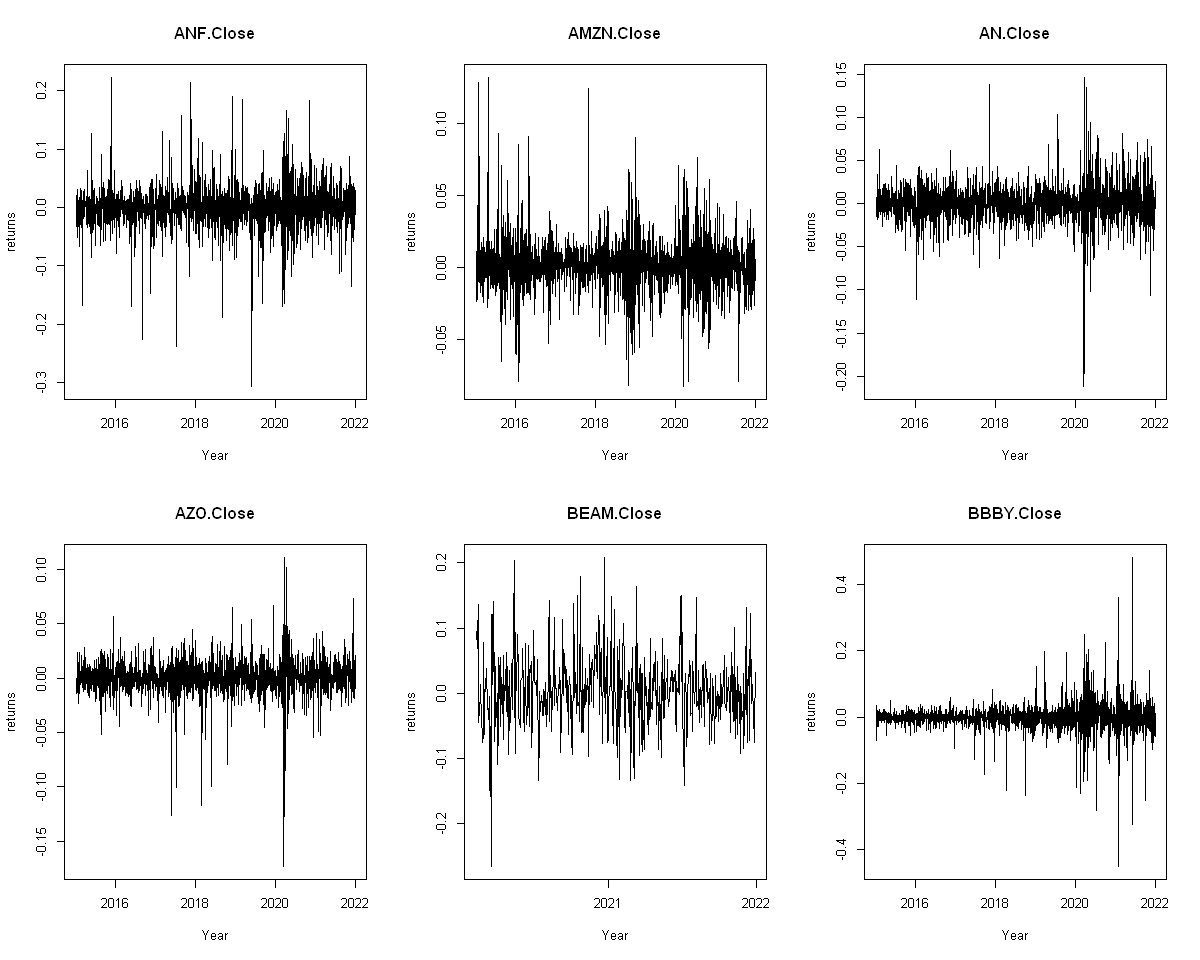

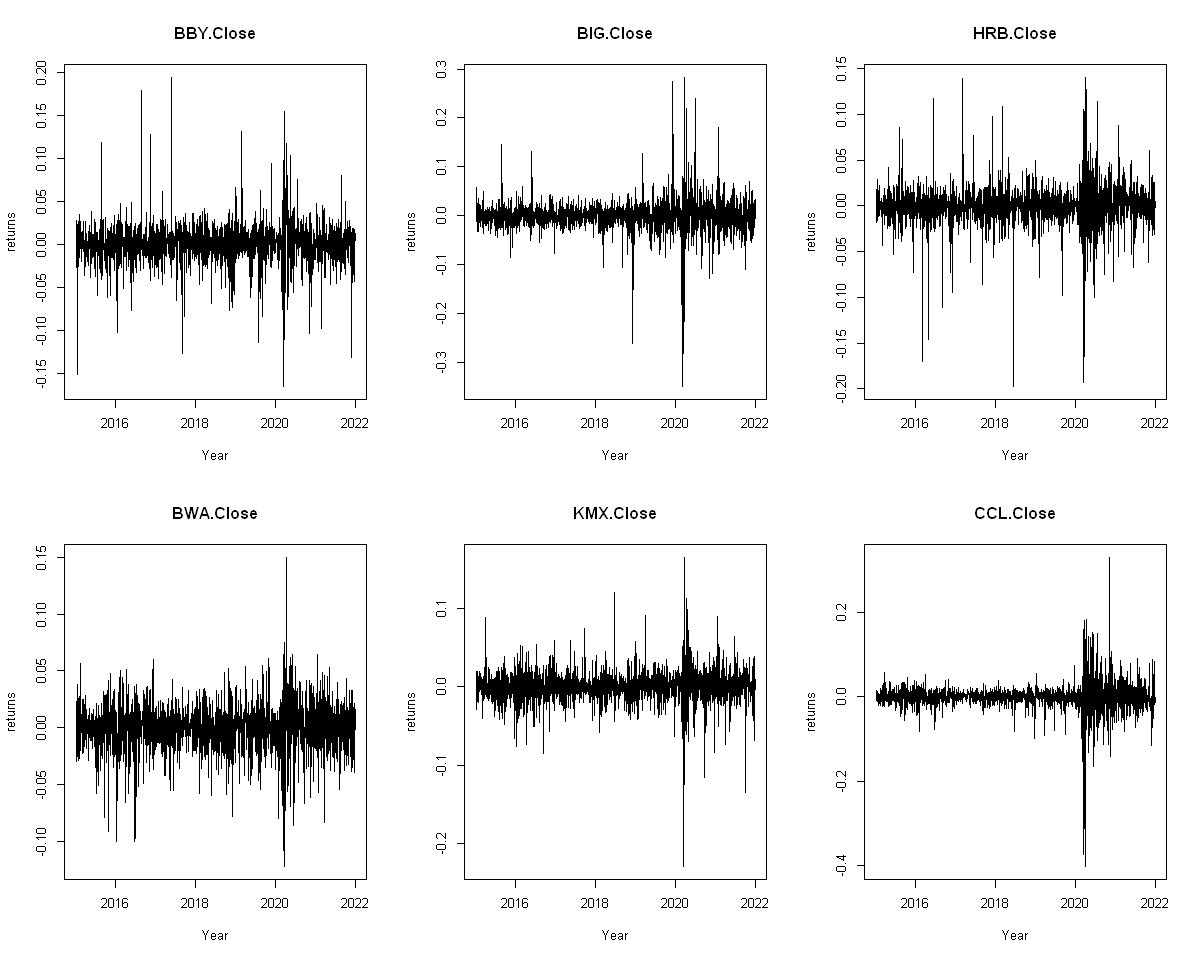

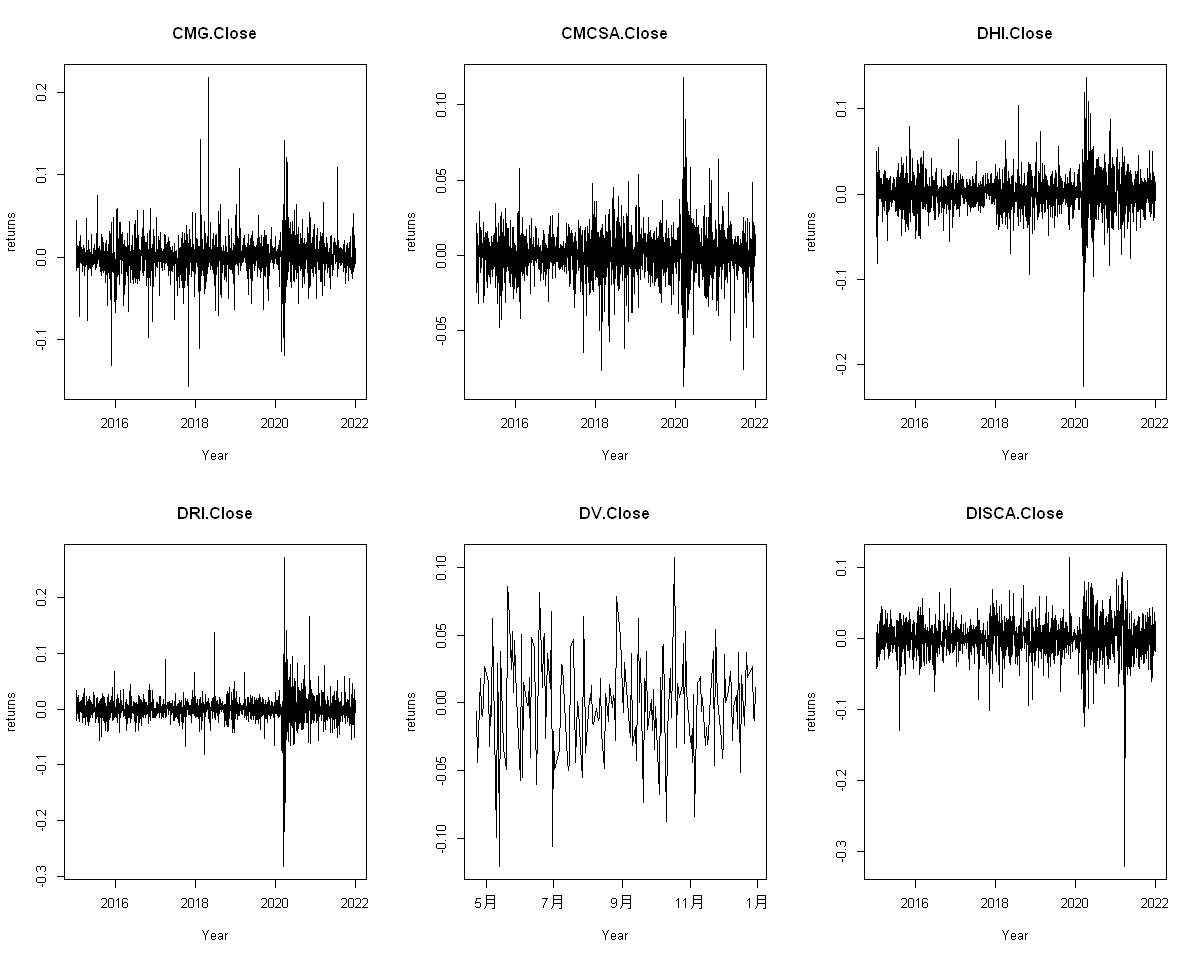

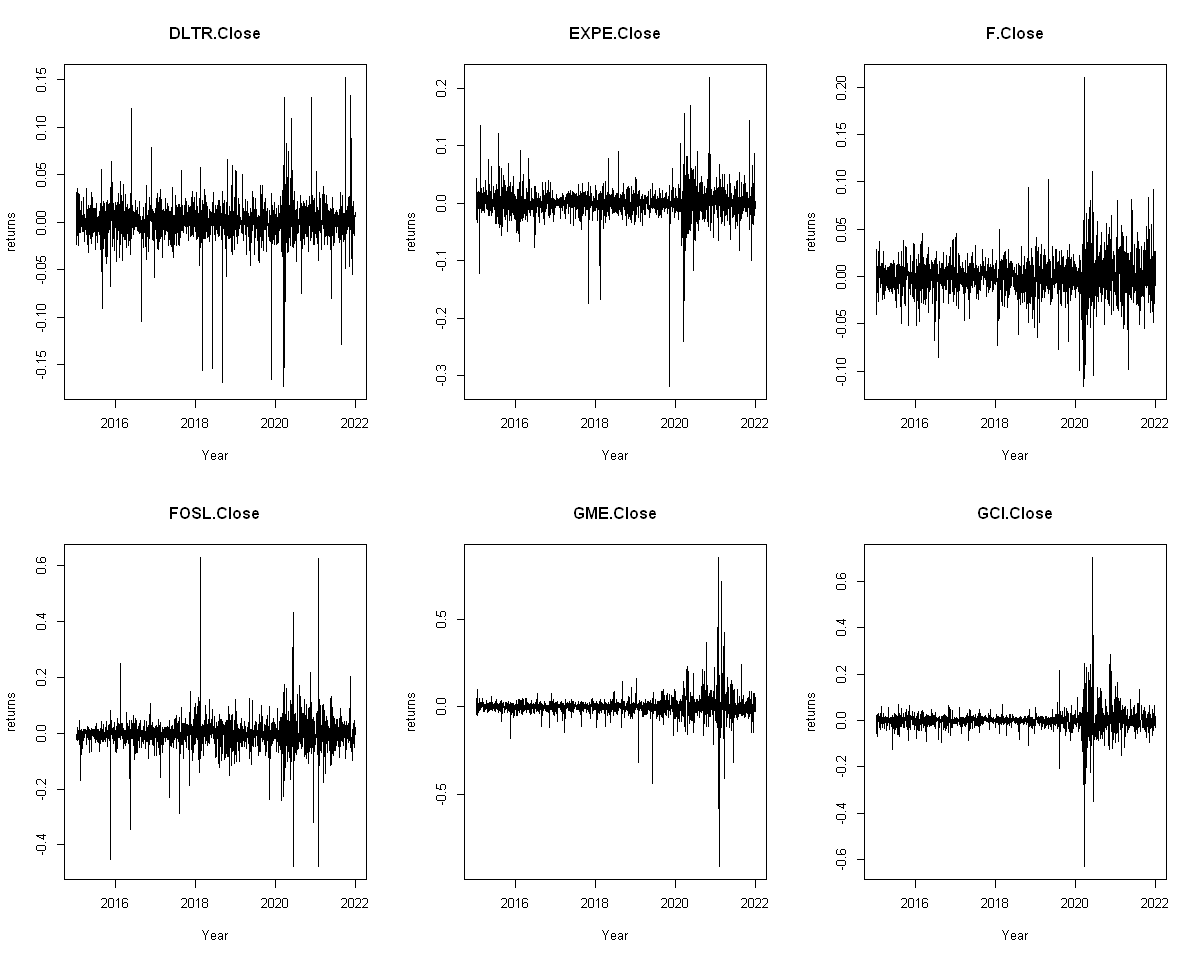

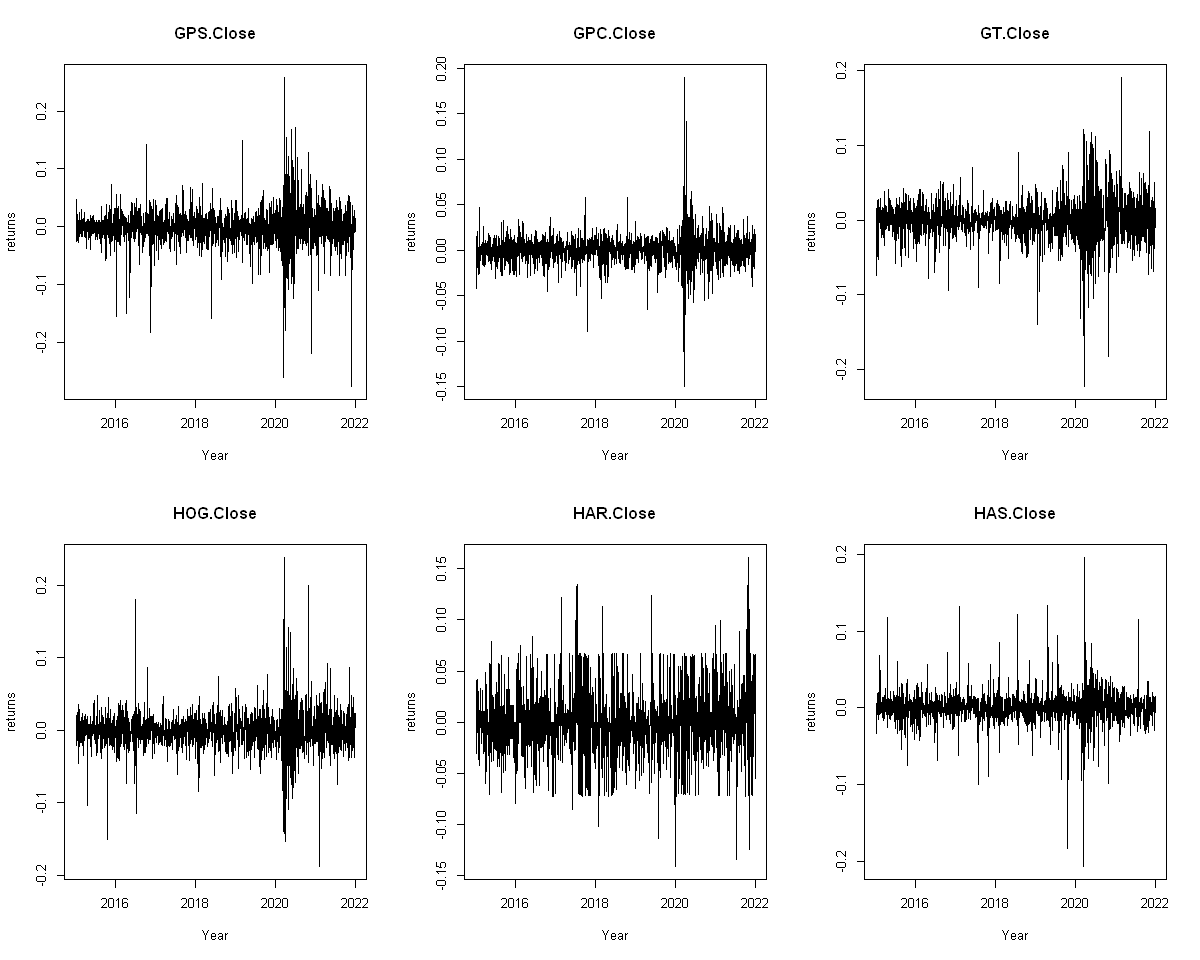

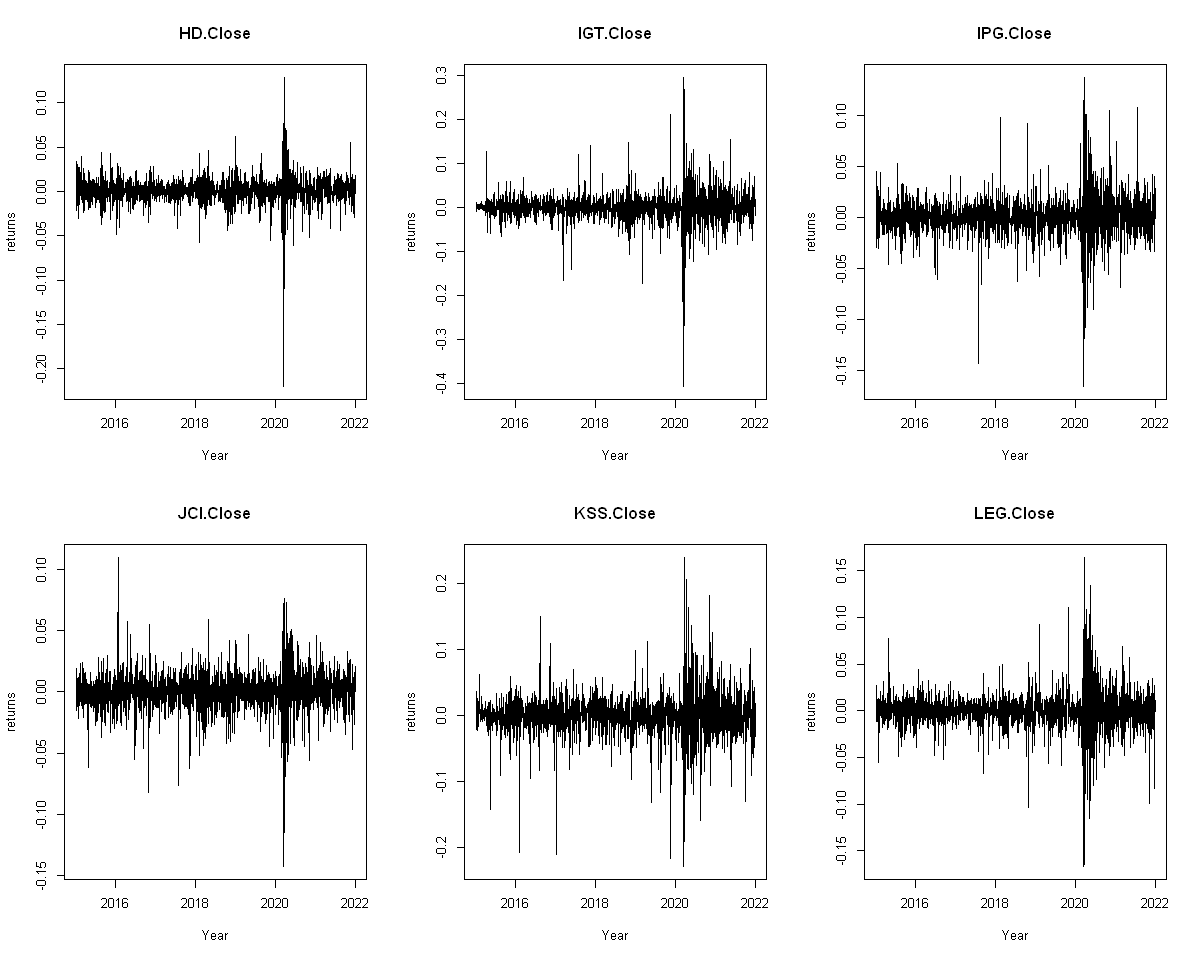

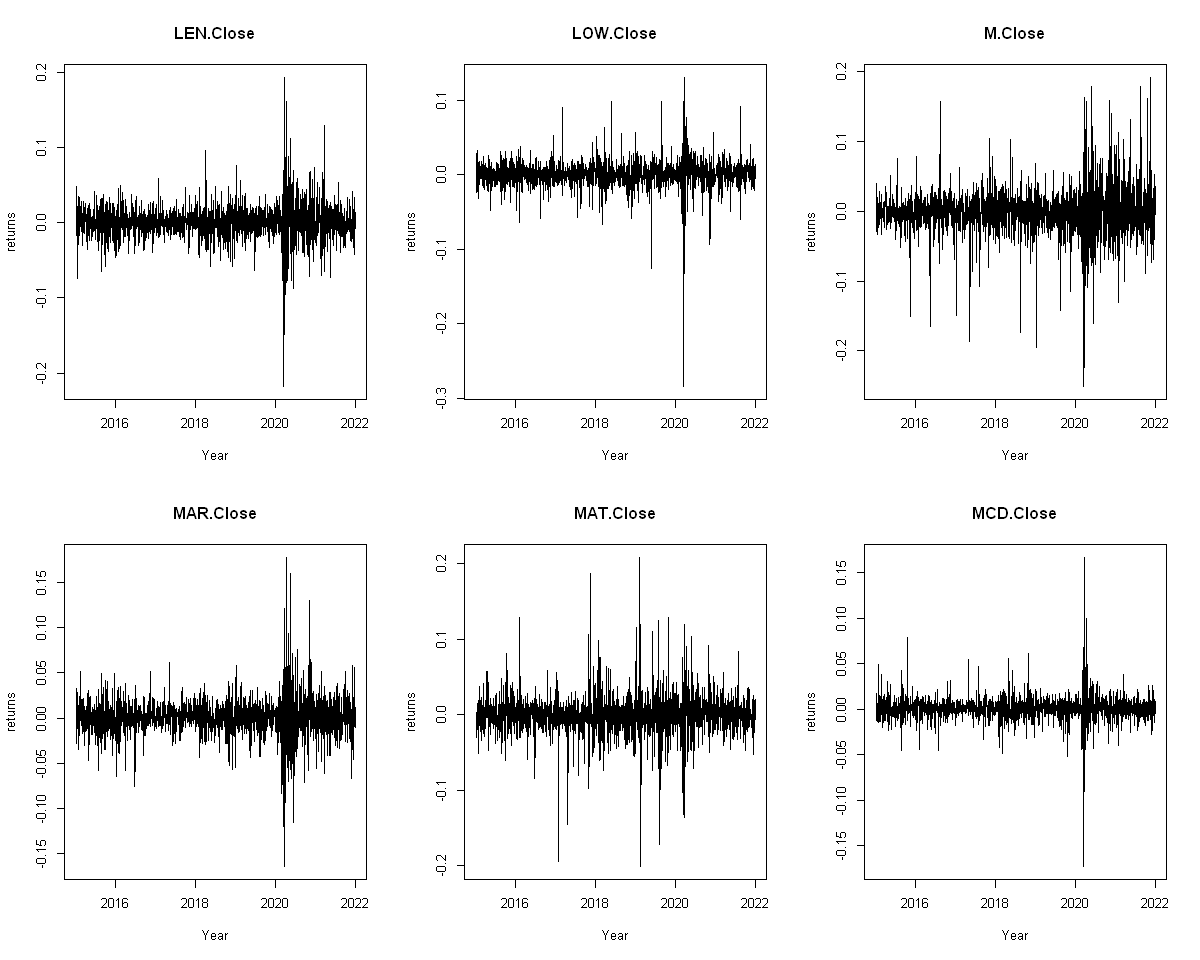

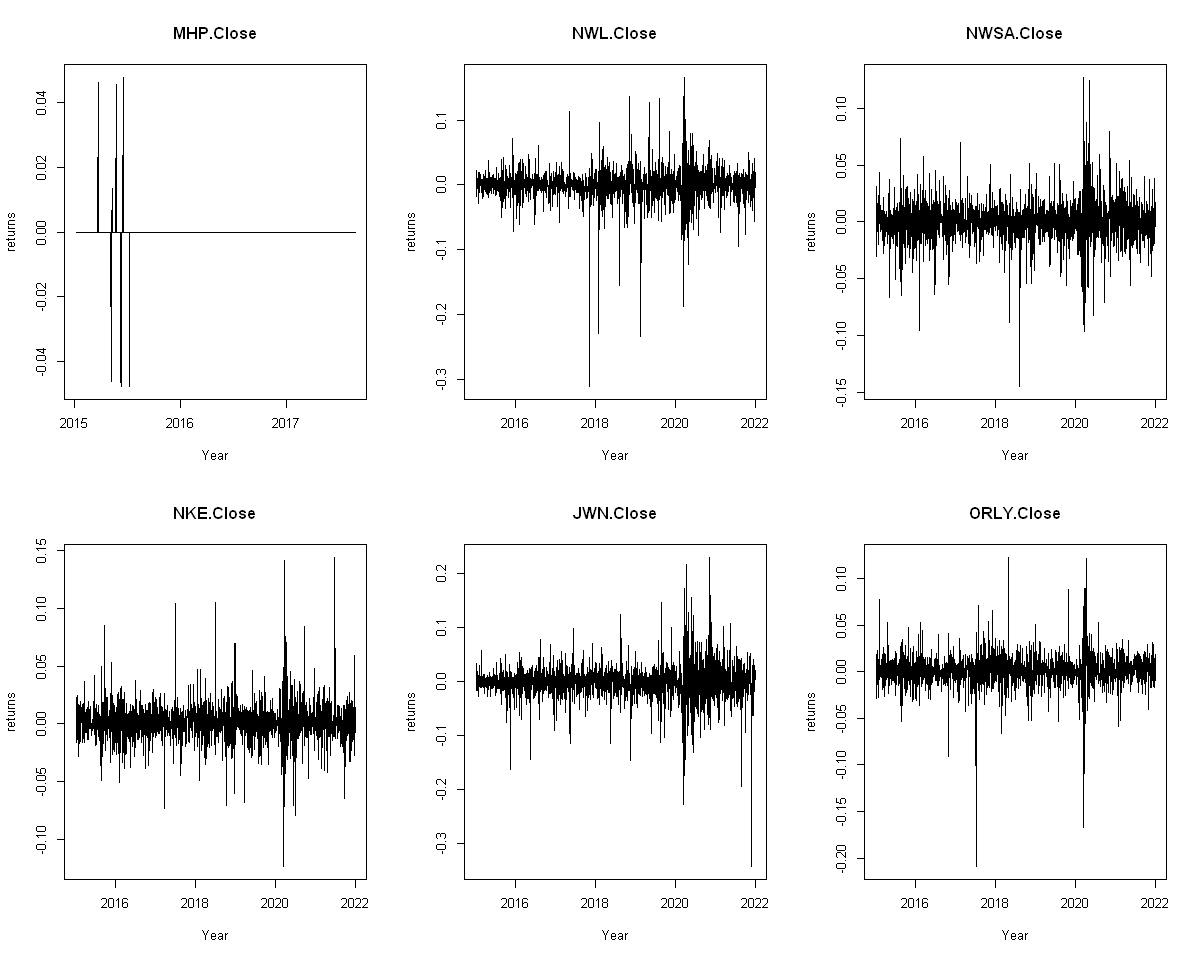

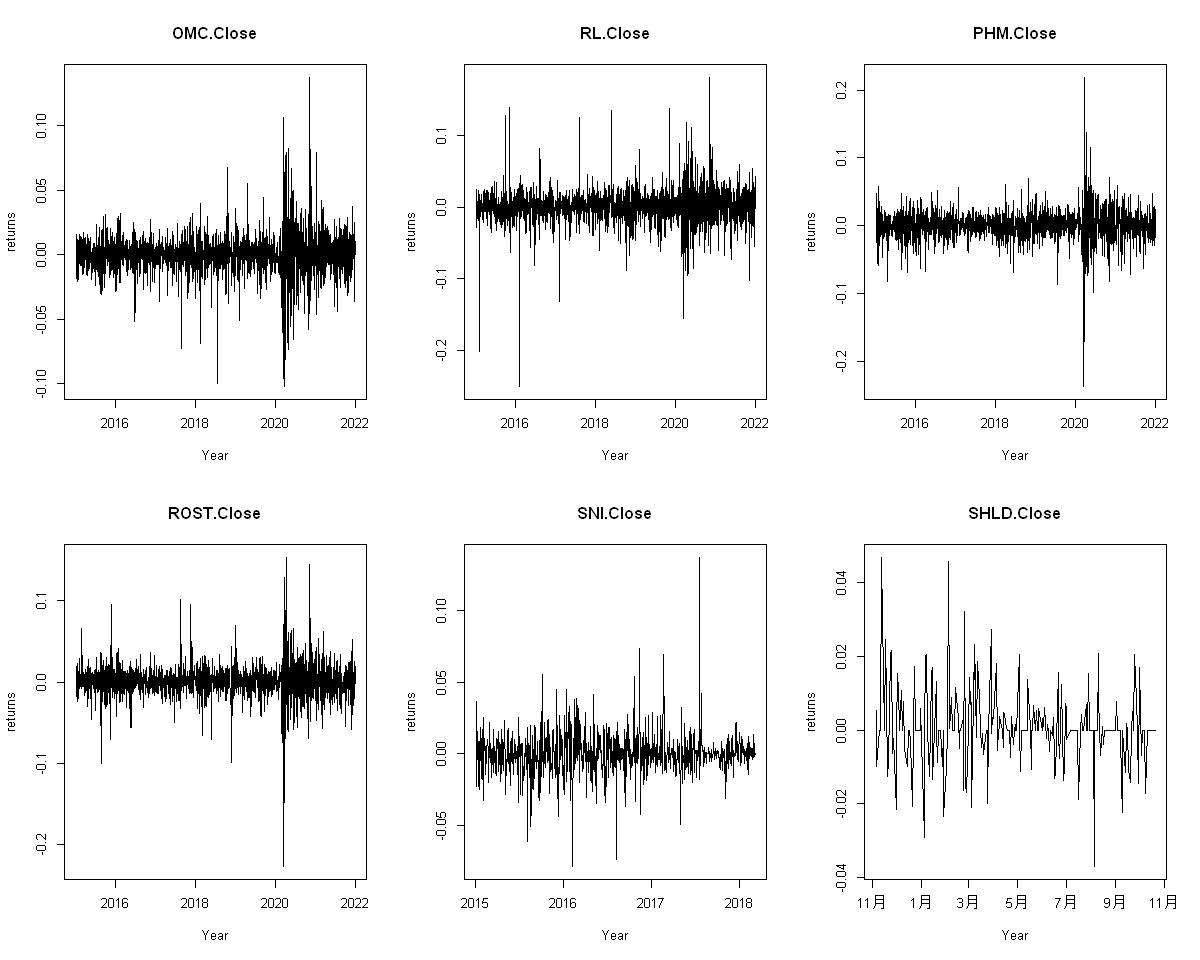

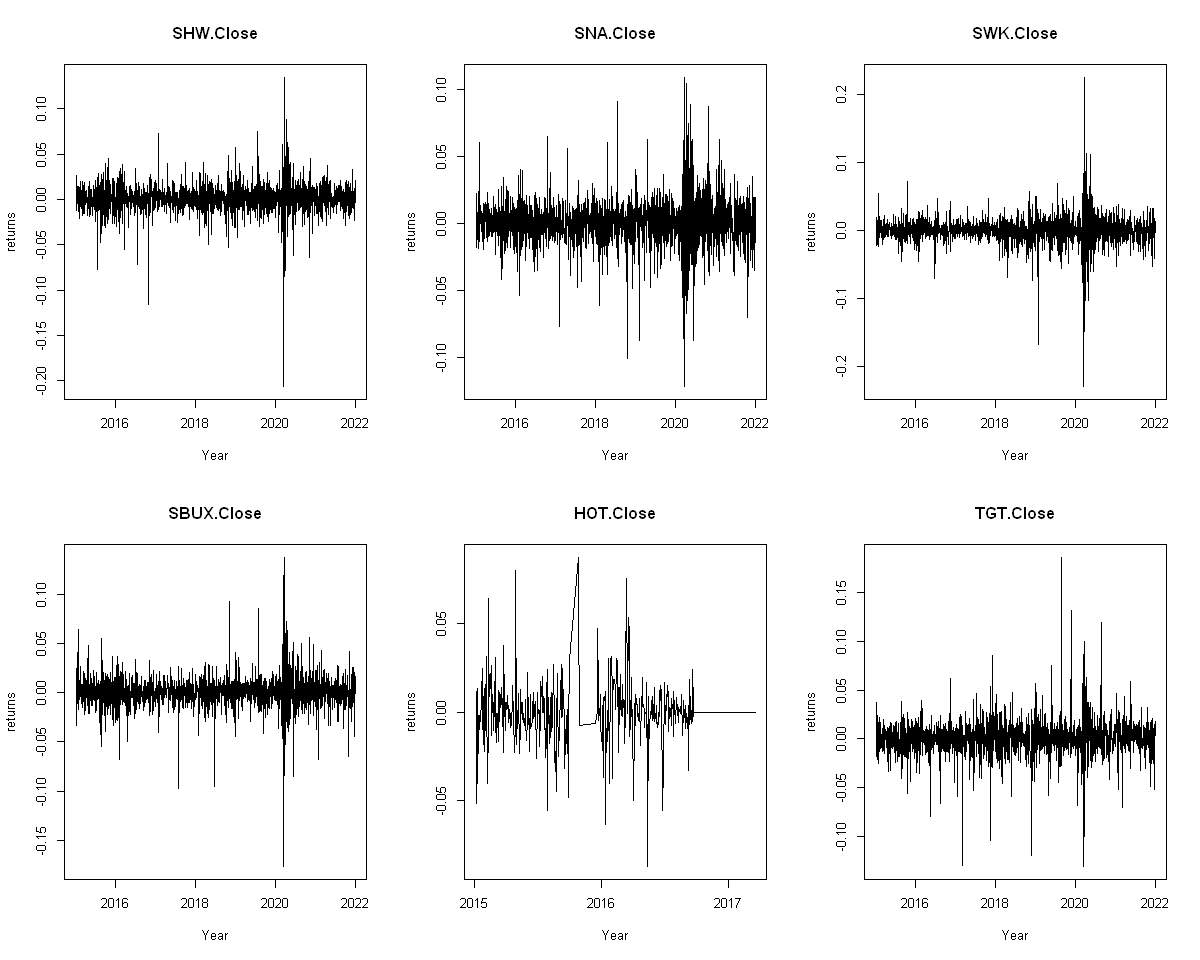

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

[[52]]
NULL

[[53]]
NULL

[[54]]
NULL

[[55]]
NULL

[[56]]
NULL

[[57]]
NULL

[[58]]
NULL

[[59]]
NULL

[[60]]
NULL

[[61]]
NULL

[[62]]
NULL

[[63]]
NULL

[[64]]
NULL

[[65]]
NULL

[[66]]
NULL

[[67]]
NULL

[[68]]
NULL

[[69]]
NULL

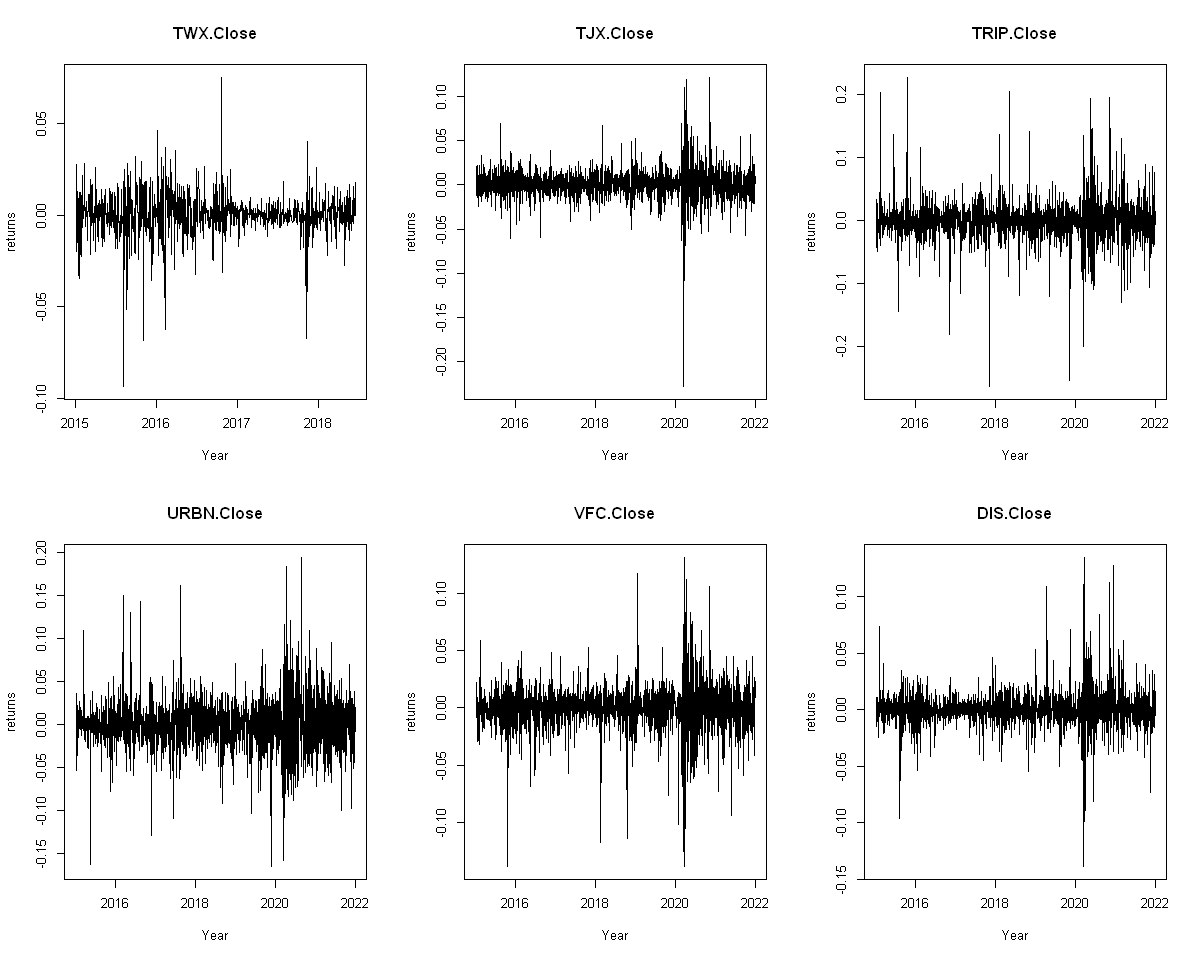

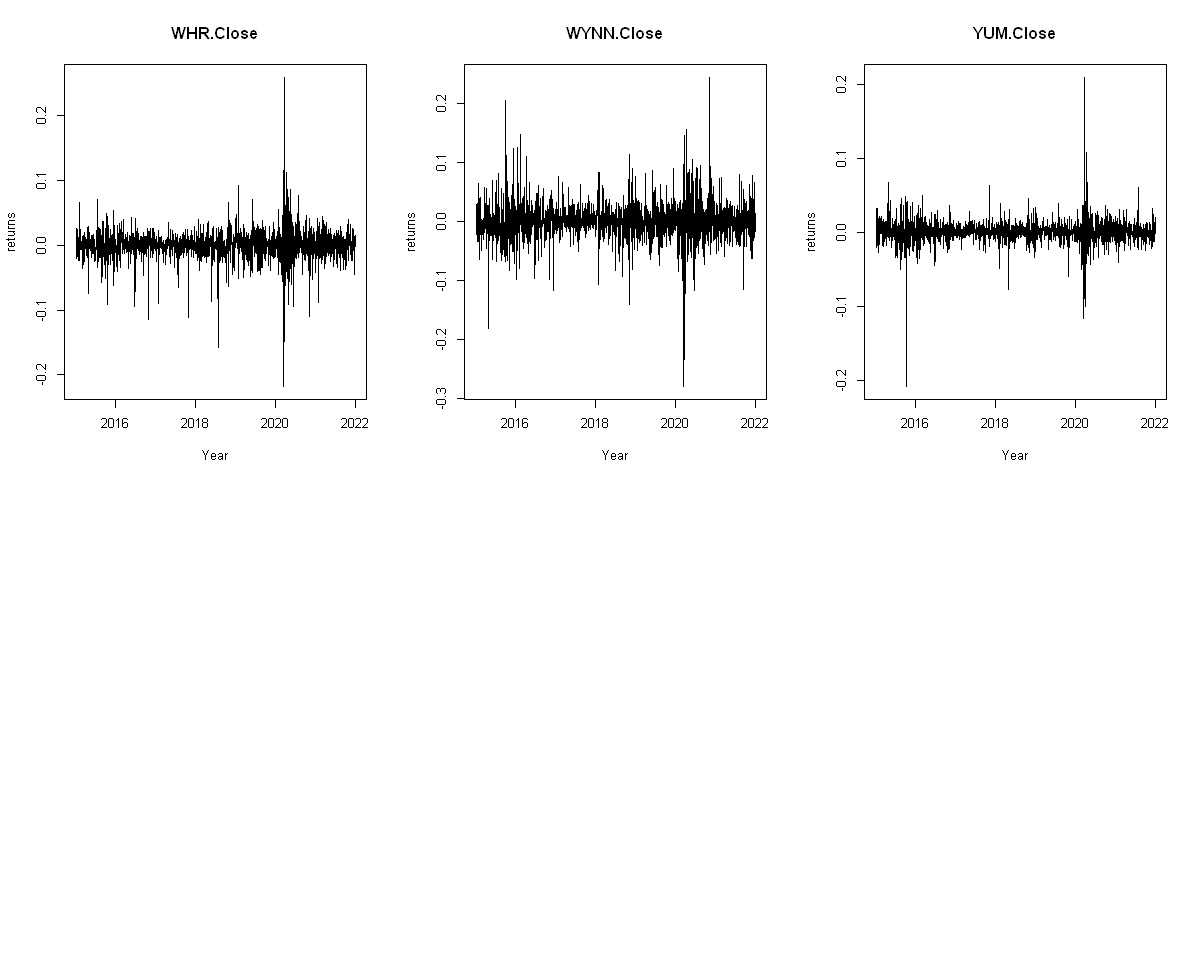

In [13]:
# Plot time series of returns of the choosen sector
par(mfrow = c(2, 3))
sapply(lrets, function(y){
    plot(as.Date(index(y)), y, type = 'l', main= colnames(y), xlab = 'Year',
     ylab = 'returns')
})

##### 

##### 4. Discard the symbols, where you don't have valid data (non-missing, non-NA) for at least 80% of the dates in the sample period (use the stocks with the most observations as the benchmark for the sample period). For each symbol in your dataset, keep only the dates where you have valid data for all of the remaining symbols, i.e. you will have N time-series with matching timestamps.  Now compute the mean logarithmic return for each date. The result should be a time-series with one (mean) log-return for each date.

In [14]:
# Check the date length of the sample period
dates <- index(lrets[[1]])
date_len <- length(dates)
date_len

# Choose benchmark at least 80% of the dates in the sample period
date_length <- date_len * 0.8
date_length

[1] 1761

[1] 1408.8

In [15]:
length(lrets)
# save lrets data before filter symbols which do not have enough date samples
lrets0 <- lrets

[1] 69

In [17]:
# remove symbols have invalid  dates 
for (i in 2:length(lrets)){
    if (nrow(lrets[[i]]) < date_length){
        print(i)
        print((lrets[[i]][1]))      
        lrets[[i]] <- NULL
    }
}

[1] 50
            SHLD.Close
2020-11-05 0.005397045


ERROR: Error in lrets[[i]]: subscript out of bounds


In [18]:
# check the number of remaining symbols
length(lrets)

# save the date before filter for common 
dates0 <-dates
length(dates)
# find the dates that are common for all the symbols
for (i in 2:length(lrets)){
    dates <- index(lrets[[i]])[index(lrets[[i]]) %in% dates]
}
length(dates)

[1] 62

[1] 1761

[1] 1752

In [19]:
# save the lrets data before filter for the common dates
lrets1 <- lrets

#filter the lrets
lrets <- lapply(lrets, function(y){
    y[index(y) %in% dates]
})

# Check if the observations are matching.
head(lapply(lrets, nrow))
tail(lapply(lrets, nrow))

[[1]]
[1] 1752

[[2]]
[1] 1752

[[3]]
[1] 1752

[[4]]
[1] 1752

[[5]]
[1] 1752

[[6]]
[1] 1752

[[1]]
[1] 1752

[[2]]
[1] 1752

[[3]]
[1] 1752

[[4]]
[1] 1752

[[5]]
[1] 1752

[[6]]
[1] 1752

In [20]:
# Calculate the time serises of cross sector means
N <- nrow(lrets[[1]])  
lrets_mean <- sapply(1:N, function(y){
   mean(sapply(lrets, '[[', y)) 
})
head(lrets_mean)

[1] -0.014313500 -0.009352073  0.018340162  0.015660506 -0.011794025
[6] -0.003917951

##### 5. Estimate the parameters of the stable distribution for the mean returns computed in 4.

In [21]:
# Calculate mean and standard deviation of the mean returns
m <- mean(na.omit(lrets_mean))
std <- sd(na.omit(lrets_mean))
print(c(m, std))

[1] 0.0001714658 0.0148098435


In [22]:
# Estimate the parameters
ret = as.numeric(na.omit(lrets_mean)) 
objKout <- Estim(EstimMethod = "Kout", data = ret, pm = 0,
                         ComputeCov = FALSE, HandleError = FALSE,
                         spacing = "Kout")
objKout

*** Class Estim, method Show *** 
** Method ** 
[1] "Koutrouvelis_spacing=Kout"
** Parameters Estimation ** 
        alpha          beta         gamma         delta 
 1.5968746372 -0.1865040729  0.0068131558  0.0006640189 
** Covariance Matrix Estimation ** 
     [,1] [,2] [,3] [,4]
[1,]   NA   NA   NA   NA
[2,]   NA   NA   NA   NA
[3,]   NA   NA   NA   NA
[4,]   NA   NA   NA   NA
** Confidence interval Estimation ** 
[1] "Confidence level= 0"
[1] "data length= 1752"
     [,1] [,2]
[1,]   NA   NA
[2,]   NA   NA
[3,]   NA   NA
[4,]   NA   NA
attr(,"level")
[1] 0
** Estimation time ** 
[1] " :duration= 0  h, 0  min, 3  sec. "
** Estimation status ** 
success
 ******* End Show (Estim) ******* 

By using Stable distribution, we estimate the mean returns of our 'Consumer Discretionary' sector as Alpha 1.59 and Beta -0.186, which is quite different from Normal Distribution

##### 6. Plot the histogram of the mean returns and compare to the densities of normal distribution, and stable distribution with the fitted parameters from the previous step.

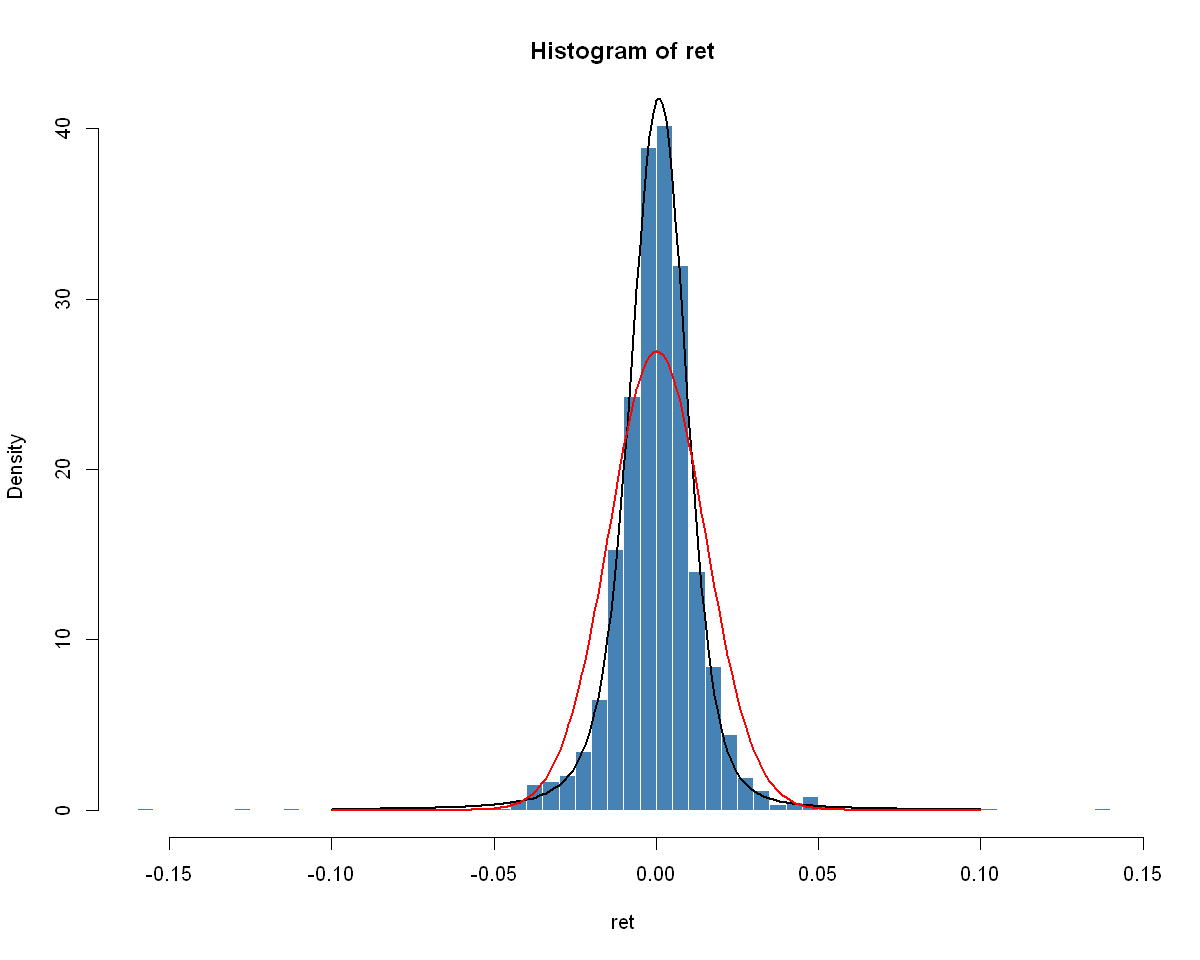

In [23]:
# Use Histogram to draw mean returns of 'Consumer Discretionary' sector
hist(ret, n = 100, probability = TRUE, border = "white",
     col = "steelblue")

# Compare with stable distribution with the fitted parameters from the previous step as the blue curve 
x <- seq(-0.1, 0.1, 0.001)
lines(x, dstable(x, alpha = objKout@par[1], beta = objKout@par[2], 
    gamma=objKout@par[3], delta=objKout@par[4],tol= 1e-3), lwd = 2)

# Compare to normal distribution as the red curve
lines(x, dnorm(x, mean = m, sd = std), lwd = 2, col = 'red')# normal distribution

By comparation, we could see, the normal distribution(red curve) does not match our sector data very good. While by using stable distribution with the fitted parameters from the previous step(blue curve), it matches better to our mean return data of of 'Consumer Discretionary' sector. 


# Problem 2

##### 1. Compute theoretical mean, and variance for both processes pt and rt. Is any of the processes stationary in terms of mean and variance? Which process has a constant variance?